In [3]:
import pandas as pd
import datetime as dt
import time
df = pd.read_csv('all_combined.csv')

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.rename(columns = {'c/a':'ca'},inplace = True)

In [8]:
df['turnstile'] = df.ca+df.unit+df.scp

In [10]:
df.head(1)

,ca,unit,scp,station,linename,division,date,time,desc,entries,exits,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,2335920,A002R05102-00-00


In [11]:
df2 = df.drop(columns = ['ca','unit','scp'])

In [15]:
df2.shape

(2667721, 9)

In [66]:
df2.desc.value_counts()

REGULAR       2658197
RECOVR AUD       9524
Name: desc, dtype: int64

In [67]:
cols = list(df2)
cols.insert(0,cols.pop(cols.index('turnstile')))
df2 = df2[cols]
df2.head()
df2.drop(df2.loc[df2.desc == 'RECOVR AUD'].index,inplace=True)

In [109]:
df2.drop(columns = ['linename','division','desc'],inplace=True)

In [13]:
min(df2.time)

'00:00:00'

In [110]:
jan1 = df2[(df2.date == '01/01/2019')]

In [111]:
jan1 = jan1.drop_duplicates(subset=['turnstile'],keep='first')

In [112]:
jan1.head()

,turnstile,station,date,time,entries,exits
18,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751
59,A002R05102-00-01,59 ST,01/01/2019,03:00:00,6154087,1379509
101,A002R05102-03-00,59 ST,01/01/2019,03:00:00,1174914,4407789
143,A002R05102-03-01,59 ST,01/01/2019,03:00:00,951925,1477987
185,A002R05102-03-02,59 ST,01/01/2019,03:00:00,6036340,8168269


In [72]:
jan1.shape

(4788, 9)

In [113]:
jan = df2[df2.date == '01/31/2019']

In [114]:
jan = jan31.drop_duplicates(subset = ['turnstile'], keep = 'last')
jan.shape

(4797, 9)

In [115]:
feb = df2[df2.date == '02/28/2019']
feb = feb31.drop_duplicates(subset = ['turnstile'], keep = 'last')
feb.shape

(4829, 9)

In [117]:
mar = df2[df2.date == '03/31/2019']
mar = mar.drop_duplicates(subset = ['turnstile'],keep='last')
mar.shape

(4847, 6)

In [118]:
apr = df2[df2.date == '04/30/2019']
apr = apr.drop_duplicates(subset = ['turnstile'], keep = 'last')
apr.shape

(4832, 6)

In [119]:
may = df2[df2.date == '05/31/2019']
may = may.drop_duplicates(subset = ['turnstile'], keep = 'last')
may.shape

(4857, 6)

In [120]:
jun = df2[df2.date == '06/30/2019']
jun = jun.drop_duplicates(subset = ['turnstile'], keep = 'last')
jun.shape

(4868, 6)

In [121]:
jul = df2[df2.date == '07/31/2019']
jul = jul.drop_duplicates(subset = ['turnstile'], keep ='last')
jul.shape

(4864, 6)

In [122]:
aug = df2[df2.date == '08/31/2019']
aug = aug.drop_duplicates(subset = ['turnstile'], keep = 'last')
aug.shape

(4883, 6)

In [123]:
sep = df2[df2.date == '09/30/2019']
sep = sep.drop_duplicates(subset = ['turnstile'], keep = 'last')
sep.shape

(4896, 6)

In [124]:
oct = df2[df2.date == '10/31/2019']
oct = oct.drop_duplicates(subset = ['turnstile'], keep ='last')
oct.shape

(4898, 6)

In [125]:
nov = df2[df2.date == '11/30/2019']
nov = nov.drop_duplicates(subset = ['turnstile'], keep = 'last')
nov.shape

(4888, 6)

In [126]:
dec = df2[df2.date == '12/31/2019']
dec = dec.drop_duplicates(subset =['turnstile'], keep='last')
dec.shape

(4915, 6)

In [127]:
jan1.head(1)

,turnstile,station,date,time,entries,exits
18,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751


In [128]:
mergetry = pd.merge(jan1,jan31[['turnstile','entries','exits']], on = ['turnstile'])

In [130]:
mergetry.shape

(4749, 8)

In [131]:
mergetry.head(1)

,turnstile,station,date,time,entries_x,exits_x,entries_y,exits_y
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222


In [132]:
mergetry.rename(columns = {'entries_x':'starting_entries',
                          'exits_x': 'starting_exits',
                          'entries_y': 'jan_entries',
                          'exits_y': 'jan_exits'},inplace = True)

In [133]:
mergetry.head()

,turnstile,station,date,time,starting_entries,starting_exits,jan_entries,jan_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222
1,A002R05102-00-01,59 ST,01/01/2019,03:00:00,6154087,1379509,6183833,1386805
2,A002R05102-03-00,59 ST,01/01/2019,03:00:00,1174914,4407789,1188012,4461911
3,A002R05102-03-01,59 ST,01/01/2019,03:00:00,951925,1477987,985893,1529522
4,A002R05102-03-02,59 ST,01/01/2019,03:00:00,6036340,8168269,6070764,8207047


In [134]:
mergetry.rename(columns = {'jan_entries':'jan_total_entries',
                          'jan_exits':'jan_total_exits'},inplace=True)

In [135]:
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222


In [148]:
mergetry['jan_entries'] = abs(mergetry.jan_total_entries - mergetry.starting_entries)
mergetry['jan_exits'] = abs(mergetry.jan_total_exits - mergetry.starting_exits)

In [137]:
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471


In [138]:
mergetry.shape

(4749, 10)

In [140]:
mergetry = pd.merge(mergetry, feb[['turnstile','entries','exits']], on = ['turnstile'])

In [141]:
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,entries,exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,6962053,2361664


In [144]:
mergetry.rename(columns = {'entries':'feb_total_entries',
                    'exits': 'feb_total_exits'},inplace=True)
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,feb_total_entries,feb_total_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,6962053,2361664


In [149]:
mergetry['feb_entries'] = abs(mergetry.feb_total_entries - mergetry.jan_total_entries)
mergetry['feb_exits'] = abs(mergetry.feb_total_exits - mergetry.jan_total_exits)
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,feb_total_entries,feb_total_exits,feb_entries,feb_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,6962053,2361664,32610,11442


In [161]:
mergetry = pd.merge(mergetry, mar[['turnstile','entries','exits']], on = ['turnstile'])
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,feb_total_entries,feb_total_exits,feb_entries,feb_exits,entries,exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,6962053,2361664,32610,11442,7000433,2374065


In [159]:
mergetry.drop(columns=['mar_total_entries'],inplace=True)

In [160]:
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,feb_total_entries,feb_total_exits,feb_entries,feb_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,6962053,2361664,32610,11442


In [162]:
mergetry.rename(columns={'entries': 'mar_total_entries',
                        'exits': 'mar_total_exits'},inplace=True)

In [163]:
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,feb_total_entries,feb_total_exits,feb_entries,feb_exits,mar_total_entries,mar_total_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,6962053,2361664,32610,11442,7000433,2374065


In [164]:
mergetry['mar_entries'] = abs(mergetry.mar_total_entries - mergetry.feb_total_entries)
mergetry['mar_exits'] = abs(mergetry.mar_total_exits - mergetry.feb_total_exits)
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,feb_total_entries,feb_total_exits,feb_entries,feb_exits,mar_total_entries,mar_total_exits,mar_entries,mar_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,6962053,2361664,32610,11442,7000433,2374065,38380,12401


In [167]:
mergetry = pd.merge(mergetry, apr[['turnstile','entries','exits']], on=['turnstile'])
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,feb_entries,feb_exits,mar_total_entries,mar_total_exits,mar_entries,mar_exits,entries_x,exits_x,entries_y,exits_y
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,32610,11442,7000433,2374065,38380,12401,7039520,2386197,7039520,2386197


In [168]:
mergetry.drop(columns = ['entries_y','exits_y'],inplace=True)

In [171]:
mergetry.rename(columns = {'entries_x': 'apr_total_entries',
                          'exits_x': 'apr_total_exits'},inplace=True)

In [172]:
mergetry['april_entries'] = mergetry.apr_total_entries - mergetry.mar_total_entries
mergetry['april_exits'] = mergetry.apr_total_exits - mergetry.mar_total_exits
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,feb_entries,feb_exits,mar_total_entries,mar_total_exits,mar_entries,mar_exits,apr_total_entries,apr_total_exits,april_entries,april_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,32610,11442,7000433,2374065,38380,12401,7039520,2386197,39087,12132


In [ ]:
mergetry = pd.merge(mergetry,may)

In [181]:
concattry = pd.concat([jan1,jan31])

In [182]:
concattry

,turnstile,station,date,time,entries,exits
18,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751
59,A002R05102-00-01,59 ST,01/01/2019,03:00:00,6154087,1379509
101,A002R05102-03-00,59 ST,01/01/2019,03:00:00,1174914,4407789
143,A002R05102-03-01,59 ST,01/01/2019,03:00:00,951925,1477987
185,A002R05102-03-02,59 ST,01/01/2019,03:00:00,6036340,8168269
...,...,...,...,...,...,...
404340,TRAM2R46900-00-01,RIT-ROOSEVELT,01/31/2019,20:00:00,2918609,33854
404382,TRAM2R46900-03-00,RIT-ROOSEVELT,01/31/2019,20:00:00,641218,24634
404424,TRAM2R46900-03-01,RIT-ROOSEVELT,01/31/2019,20:00:00,3021383,390543
404466,TRAM2R46900-05-00,RIT-ROOSEVELT,01/31/2019,20:00:00,2850,62


In [184]:
concattry.pivot(index='turnstile', columns = 'date', values = ['entries','exits'])

entries                 exits           
date              01/01/2019 01/31/2019 01/01/2019 01/31/2019
turnstile                                                    
A002R05102-00-00   6891983.0  6929443.0  2336751.0  2350222.0
A002R05102-00-01   6154087.0  6183833.0  1379509.0  1386805.0
A002R05102-03-00   1174914.0  1188012.0  4407789.0  4461911.0
A002R05102-03-01    951925.0   985893.0  1477987.0  1529522.0
A002R05102-03-02   6036340.0  6070764.0  8168269.0  8207047.0
...                      ...        ...        ...        ...
TRAM2R46900-00-01  2876975.0  2918609.0    33342.0    33854.0
TRAM2R46900-03-00   635516.0   641218.0    24341.0    24634.0
TRAM2R46900-03-01  3015572.0  3021383.0   390232.0   390543.0
TRAM2R46900-05-00     2838.0     2850.0       62.0       62.0
TRAM2R46900-05-01     5554.0     5554.0      366.0      368.0

[4836 rows x 4 columns]

In [186]:
concattry = 0

In [188]:
concattry = pd.concat([jan1,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec])

In [191]:
concattry.drop(columns = ['linename','division','desc'],inplace=True)

In [192]:
concattry.head()

,turnstile,station,date,time,entries,exits
18,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751
59,A002R05102-00-01,59 ST,01/01/2019,03:00:00,6154087,1379509
101,A002R05102-03-00,59 ST,01/01/2019,03:00:00,1174914,4407789
143,A002R05102-03-01,59 ST,01/01/2019,03:00:00,951925,1477987
185,A002R05102-03-02,59 ST,01/01/2019,03:00:00,6036340,8168269


In [195]:
concattry.sample(5, random_state = 7)

,turnstile,station,date,time,entries,exits
762980,R232R17602-00-00,33 ST,03/31/2019,21:00:00,3206163,5130161
248361,N043R18600-00-02,86 ST,01/31/2019,23:00:00,16566427,6476099
1933178,N339AR11400-03-00,PARSONS BLVD,09/30/2019,20:00:00,1174441,1193399
2121360,N193R33700-00-00,BEACH 44 ST,10/31/2019,20:00:00,7560,19254
123985,PTH22R54000-02-00,PATH NEW WTC,01/01/2019,03:01:30,263677,207914


In [198]:
pivottry1 = concattry.pivot(index='turnstile',columns='date',values=['entries','exits'])
pivottry1.head()

entries                                              \
date             01/01/2019 01/31/2019 02/28/2019 03/31/2019 04/30/2019   
turnstile                                                                 
A002R05102-00-00  6891983.0  6929443.0  6962053.0  7000433.0  7039520.0   
A002R05102-00-01  6154087.0  6183833.0  6209639.0  6239901.0  6271780.0   
A002R05102-03-00  1174914.0  1188012.0  1199246.0  1212025.0  1225904.0   
A002R05102-03-01   951925.0   985893.0  1016394.0  1050670.0  1086505.0   
A002R05102-03-02  6036340.0  6070764.0  6100173.0  6134247.0  6170562.0   

                                                                         ...  \
date             05/31/2019 06/30/2019 07/31/2019 08/31/2019 09/30/2019  ...   
turnstile                                                                ...   
A002R05102-00-00  7079862.0  7118006.0  7153562.0  7183842.0  7218323.0  ...   
A002R05102-00-01  6304708.0  6336370.0  6366237.0  6392752.0  6421029.0  ...   
A002R05102-03-00  1239715.0  1252491.0  1265481.0  1280502.0  1293799.0  ...   
A002R05102-03-01  1122983.0  1157019.0  1191864.0  1235140.0  1271656.0  ...   
A002R05102-03-02  6207802.0  6242426.0  6278096.0  6321976.0  6358265.0  ...   

                      exits                                              \
date             03/31/2019 04/30/2019 05/31/2019 06/30/2019 07/31/2019   
turnstile                                                                 
A002R05102-00-00  2374065.0  2386197.0  2398858.0  2410568.0  2420891.0   
A002R05102-00-01  1399445.0  1406543.0  1414139.0  1420907.0  1427047.0   
A002R05102-03-00  4555321.0  4608983.0  4662263.0  4712865.0  4759627.0   
A002R05102-03-01  1623693.0  1676489.0  1732650.0  1783774.0  1832602.0   
A002R05102-03-02  8281025.0  8320853.0  8361975.0  8398923.0  8437833.0   

                                                                         
date             08/31/2019 09/30/2019 10/31/2019 11/30/2019 12/31/2019  
turnstile                                                                
A002R05102-00-00  2433348.0  2445111.0  2458157.0  2470898.0  2483723.0  
A002R05102-00-01  1434877.0  1441795.0  1449008.0  1455867.0  1463432.0  
A002R05102-03-00  4816187.0  4870618.0  4929379.0  4985950.0  5041602.0  
A002R05102-03-01  1885496.0  1937196.0  1991737.0  2048131.0  2101904.0  
A002R05102-03-02  8472845.0  8510545.0  8549523.0  8590577.0  8630142.0  

[5 rows x 26 columns]

In [203]:
pivottry2= concattry.pivot_table(index='turnstile', columns='date',aggfunc='diff')

In [204]:
pivottry2.head()

""


In [205]:
concattry2 = concattry[['turnstile','date','entries','exits']]

In [207]:
concattry2.head(1)

,turnstile,date,entries,exits
18,A002R05102-00-00,01/01/2019,6891983,2336751


In [220]:
pivottry3 = concattry2.pivot_table(index='turnstile', columns='date')

In [221]:
pivottry3.head()

entries                                              \
date             01/01/2019 01/31/2019 02/28/2019 03/31/2019 04/30/2019   
turnstile                                                                 
A002R05102-00-00  6891983.0  6929443.0  6962053.0  7000433.0  7039520.0   
A002R05102-00-01  6154087.0  6183833.0  6209639.0  6239901.0  6271780.0   
A002R05102-03-00  1174914.0  1188012.0  1199246.0  1212025.0  1225904.0   
A002R05102-03-01   951925.0   985893.0  1016394.0  1050670.0  1086505.0   
A002R05102-03-02  6036340.0  6070764.0  6100173.0  6134247.0  6170562.0   

                                                                         ...  \
date             05/31/2019 06/30/2019 07/31/2019 08/31/2019 09/30/2019  ...   
turnstile                                                                ...   
A002R05102-00-00  7079862.0  7118006.0  7153562.0  7183842.0  7218323.0  ...   
A002R05102-00-01  6304708.0  6336370.0  6366237.0  6392752.0  6421029.0  ...   
A002R05102-03-00  1239715.0  1252491.0  1265481.0  1280502.0  1293799.0  ...   
A002R05102-03-01  1122983.0  1157019.0  1191864.0  1235140.0  1271656.0  ...   
A002R05102-03-02  6207802.0  6242426.0  6278096.0  6321976.0  6358265.0  ...   

                      exits                                              \
date             03/31/2019 04/30/2019 05/31/2019 06/30/2019 07/31/2019   
turnstile                                                                 
A002R05102-00-00  2374065.0  2386197.0  2398858.0  2410568.0  2420891.0   
A002R05102-00-01  1399445.0  1406543.0  1414139.0  1420907.0  1427047.0   
A002R05102-03-00  4555321.0  4608983.0  4662263.0  4712865.0  4759627.0   
A002R05102-03-01  1623693.0  1676489.0  1732650.0  1783774.0  1832602.0   
A002R05102-03-02  8281025.0  8320853.0  8361975.0  8398923.0  8437833.0   

                                                                         
date             08/31/2019 09/30/2019 10/31/2019 11/30/2019 12/31/2019  
turnstile                                                                
A002R05102-00-00  2433348.0  2445111.0  2458157.0  2470898.0  2483723.0  
A002R05102-00-01  1434877.0  1441795.0  1449008.0  1455867.0  1463432.0  
A002R05102-03-00  4816187.0  4870618.0  4929379.0  4985950.0  5041602.0  
A002R05102-03-01  1885496.0  1937196.0  1991737.0  2048131.0  2101904.0  
A002R05102-03-02  8472845.0  8510545.0  8549523.0  8590577.0  8630142.0  

[5 rows x 26 columns]

In [216]:
len(pivottry1.date)

AttributeError: 'DataFrame' object has no attribute 'date'

In [222]:
concattry.head(1)

,turnstile,station,date,time,entries,exits
18,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751


In [249]:
pivottry3 = concattry.pivot_table(index='station',columns='date', values=['entries','exits'])

In [250]:
pivottry3.head()

entries                                            \
date             01/01/2019    01/31/2019    02/28/2019    03/31/2019   
station                                                                 
1 AV           3.041094e+08  3.041648e+08  1.412367e+08  1.412838e+08   
103 ST         1.049357e+07  1.054564e+07  1.059374e+07  1.498798e+08   
103 ST-CORONA  7.661137e+06  7.718684e+06  7.772629e+06  7.831321e+06   
104 ST         5.386977e+08  5.387059e+08  5.387137e+08  5.387229e+08   
110 ST         6.091284e+06  6.137917e+06  6.180451e+06  6.228998e+06   

                                                                       \
date             04/30/2019    05/31/2019    06/30/2019    07/31/2019   
station                                                                 
1 AV           1.413361e+08  1.413835e+08  1.414282e+08  1.414705e+08   
103 ST         1.182167e+07  1.187890e+07  1.192757e+07  9.507278e+06   
103 ST-CORONA  7.891392e+06  7.954191e+06  8.013150e+06  8.070735e+06   
104 ST         5.387321e+08  5.387414e+08  5.387500e+08  5.387579e+08   
110 ST         6.275639e+06  6.325150e+06  6.371196e+06  6.412795e+06   

                                           ...         exits                \
date             08/31/2019    09/30/2019  ...    03/31/2019    04/30/2019   
station                                    ...                               
1 AV           1.415106e+08  1.415513e+08  ...  1.462957e+08  1.463543e+08   
103 ST         9.556060e+06  9.609261e+06  ...  1.525539e+08  4.142500e+07   
103 ST-CORONA  8.129793e+06  8.191081e+06  ...  7.900855e+06  7.945471e+06   
104 ST         5.387658e+08  5.387739e+08  ...  3.920762e+08  3.920787e+08   
110 ST         6.456587e+06  6.503547e+06  ...  5.961724e+06  6.003808e+06   

                                                                       \
date             05/31/2019    06/30/2019    07/31/2019    08/31/2019   
station                                                                 
1 AV           1.464083e+08  1.464585e+08  1.465060e+08  1.465514e+08   
103 ST         4.146507e+07  4.150045e+07  7.805719e+06  7.842021e+06   
103 ST-CORONA  7.990813e+06  8.033704e+06  8.077952e+06  8.123577e+06   
104 ST         3.920815e+08  3.920841e+08  3.920864e+08  3.920885e+08   
110 ST         6.048285e+06  6.090050e+06  6.130388e+06  6.172222e+06   

                                                                       
date             09/30/2019    10/31/2019    11/30/2019    12/31/2019  
station                                                                
1 AV           1.465968e+08  9.776596e+07  4.448283e+07  4.452988e+07  
103 ST         7.880270e+06  7.921611e+06  7.959660e+06  7.728797e+06  
103 ST-CORONA  8.169364e+06  8.217206e+06  8.262420e+06  8.308264e+06  
104 ST         3.920908e+08  1.099579e+08  1.099634e+08  1.099685e+08  
110 ST         6.214622e+06  6.260168e+06  6.302660e+06  6.344684e+06  

[5 rows x 26 columns]

In [228]:
list(pivottry1)

[('entries', '01/01/2019'),
 ('entries', '01/31/2019'),
 ('entries', '02/28/2019'),
 ('entries', '03/31/2019'),
 ('entries', '04/30/2019'),
 ('entries', '05/31/2019'),
 ('entries', '06/30/2019'),
 ('entries', '07/31/2019'),
 ('entries', '08/31/2019'),
 ('entries', '09/30/2019'),
 ('entries', '10/31/2019'),
 ('entries', '11/30/2019'),
 ('entries', '12/31/2019'),
 ('exits', '01/01/2019'),
 ('exits', '01/31/2019'),
 ('exits', '02/28/2019'),
 ('exits', '03/31/2019'),
 ('exits', '04/30/2019'),
 ('exits', '05/31/2019'),
 ('exits', '06/30/2019'),
 ('exits', '07/31/2019'),
 ('exits', '08/31/2019'),
 ('exits', '09/30/2019'),
 ('exits', '10/31/2019'),
 ('exits', '11/30/2019'),
 ('exits', '12/31/2019')]

In [238]:
pivottry1.head()

entries                                              \
date             01/01/2019 01/31/2019 02/28/2019 03/31/2019 04/30/2019   
turnstile                                                                 
A002R05102-00-00  6891983.0  6929443.0  6962053.0  7000433.0  7039520.0   
A002R05102-00-01  6154087.0  6183833.0  6209639.0  6239901.0  6271780.0   
A002R05102-03-00  1174914.0  1188012.0  1199246.0  1212025.0  1225904.0   
A002R05102-03-01   951925.0   985893.0  1016394.0  1050670.0  1086505.0   
A002R05102-03-02  6036340.0  6070764.0  6100173.0  6134247.0  6170562.0   

                                                                         ...  \
date             05/31/2019 06/30/2019 07/31/2019 08/31/2019 09/30/2019  ...   
turnstile                                                                ...   
A002R05102-00-00  7079862.0  7118006.0  7153562.0  7183842.0  7218323.0  ...   
A002R05102-00-01  6304708.0  6336370.0  6366237.0  6392752.0  6421029.0  ...   
A002R05102-03-00  1239715.0  1252491.0  1265481.0  1280502.0  1293799.0  ...   
A002R05102-03-01  1122983.0  1157019.0  1191864.0  1235140.0  1271656.0  ...   
A002R05102-03-02  6207802.0  6242426.0  6278096.0  6321976.0  6358265.0  ...   

                      exits                                              \
date             03/31/2019 04/30/2019 05/31/2019 06/30/2019 07/31/2019   
turnstile                                                                 
A002R05102-00-00  2374065.0  2386197.0  2398858.0  2410568.0  2420891.0   
A002R05102-00-01  1399445.0  1406543.0  1414139.0  1420907.0  1427047.0   
A002R05102-03-00  4555321.0  4608983.0  4662263.0  4712865.0  4759627.0   
A002R05102-03-01  1623693.0  1676489.0  1732650.0  1783774.0  1832602.0   
A002R05102-03-02  8281025.0  8320853.0  8361975.0  8398923.0  8437833.0   

                                                                         
date             08/31/2019 09/30/2019 10/31/2019 11/30/2019 12/31/2019  
turnstile                                                                
A002R05102-00-00  2433348.0  2445111.0  2458157.0  2470898.0  2483723.0  
A002R05102-00-01  1434877.0  1441795.0  1449008.0  1455867.0  1463432.0  
A002R05102-03-00  4816187.0  4870618.0  4929379.0  4985950.0  5041602.0  
A002R05102-03-01  1885496.0  1937196.0  1991737.0  2048131.0  2101904.0  
A002R05102-03-02  8472845.0  8510545.0  8549523.0  8590577.0  8630142.0  

[5 rows x 26 columns]

In [252]:
pivottry3 = concattry.pivot(index='turnstile',columns='date',values=['entries'])

In [253]:
pivottry3

entries                                              \
date              01/01/2019 01/31/2019 02/28/2019 03/31/2019 04/30/2019   
turnstile                                                                  
A002R05102-00-00   6891983.0  6929443.0  6962053.0  7000433.0  7039520.0   
A002R05102-00-01   6154087.0  6183833.0  6209639.0  6239901.0  6271780.0   
A002R05102-03-00   1174914.0  1188012.0  1199246.0  1212025.0  1225904.0   
A002R05102-03-01    951925.0   985893.0  1016394.0  1050670.0  1086505.0   
A002R05102-03-02   6036340.0  6070764.0  6100173.0  6134247.0  6170562.0   
...                      ...        ...        ...        ...        ...   
TRAM2R46900-00-01  2876975.0  2918609.0  2944684.0  2966748.0  3012669.0   
TRAM2R46900-03-00   635516.0   641218.0   647476.0   650526.0   662320.0   
TRAM2R46900-03-01  3015572.0  3021383.0  3027722.0  3030932.0  3043391.0   
TRAM2R46900-05-00     2838.0     2850.0     2854.0     2870.0     2880.0   
TRAM2R46900-05-01     5554.0     5554.0     5554.0     5554.0     5554.0   

                                                                          \
date              05/31/2019 06/30/2019 07/31/2019 08/31/2019 09/30/2019   
turnstile                                                                  
A002R05102-00-00   7079862.0  7118006.0  7153562.0  7183842.0  7218323.0   
A002R05102-00-01   6304708.0  6336370.0  6366237.0  6392752.0  6421029.0   
A002R05102-03-00   1239715.0  1252491.0  1265481.0  1280502.0  1293799.0   
A002R05102-03-01   1122983.0  1157019.0  1191864.0  1235140.0  1271656.0   
A002R05102-03-02   6207802.0  6242426.0  6278096.0  6321976.0  6358265.0   
...                      ...        ...        ...        ...        ...   
TRAM2R46900-00-01  3054733.0  3098896.0  3142893.0  3200720.0  3252753.0   
TRAM2R46900-03-00   671794.0   679408.0   688227.0   698202.0   707721.0   
TRAM2R46900-03-01  3053267.0  3061248.0  3070213.0  3080524.0  3090028.0   
TRAM2R46900-05-00     2901.0     2918.0     2930.0     2956.0     2993.0   
TRAM2R46900-05-01     5554.0     5554.0     5554.0     5554.0     5554.0   

                                                    
date              10/31/2019 11/30/2019 12/31/2019  
turnstile                                           
A002R05102-00-00   7254605.0  7291597.0  7327981.0  
A002R05102-00-01   6450585.0  6480337.0  6511664.0  
A002R05102-03-00   1307239.0  1321053.0  1336138.0  
A002R05102-03-01   1305488.0  1339253.0  1372664.0  
A002R05102-03-02   6392485.0  6425600.0  6457226.0  
...                      ...        ...        ...  
TRAM2R46900-00-01  3295782.0  3332619.0  3368564.0  
TRAM2R46900-03-00   717751.0   725808.0   732578.0  
TRAM2R46900-03-01  3099512.0  3107210.0  3114168.0  
TRAM2R46900-05-00     3014.0     3027.0     3037.0  
TRAM2R46900-05-01     5554.0     5554.0     5554.0  

[4985 rows x 13 columns]

In [254]:
pivottry4 = concattry.pivot(index = ['turnstile','station'], columns = 'date', values = 'entries')
    

In [269]:
plt.plot(pivottry1.turnstile,pivottry1.entries)

AttributeError: 'DataFrame' object has no attribute 'turnstile'

In [271]:
def tryplot(turnstile, date):
    data= pivottry1.loc[turnstile,date]
    return plt.plot(pivottry1.index, pivottry1.value)

tryplot('A002R05102-00-00','01/01/2019')
    

KeyError: '01/01/2019'

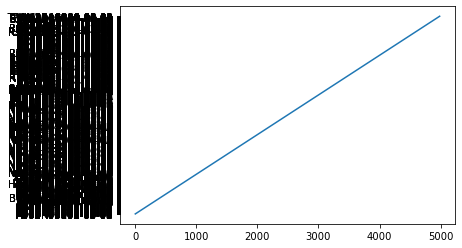

In [273]:
plt.plot(pivottry1.index)

TypeError: 'value' must be an instance of str or bytes, not a numpy.int64

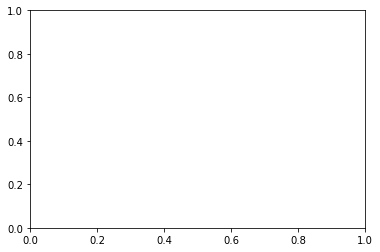

In [275]:
plt.plot(df2.loc[0],df2.entries)

In [277]:
pivottry1.iloc[0]

         date      
entries  01/01/2019    6891983.0
         01/31/2019    6929443.0
         02/28/2019    6962053.0
         03/31/2019    7000433.0
         04/30/2019    7039520.0
         05/31/2019    7079862.0
         06/30/2019    7118006.0
         07/31/2019    7153562.0
         08/31/2019    7183842.0
         09/30/2019    7218323.0
         10/31/2019    7254605.0
         11/30/2019    7291597.0
         12/31/2019    7327981.0
exits    01/01/2019    2336751.0
         01/31/2019    2350222.0
         02/28/2019    2361664.0
         03/31/2019    2374065.0
         04/30/2019    2386197.0
         05/31/2019    2398858.0
         06/30/2019    2410568.0
         07/31/2019    2420891.0
         08/31/2019    2433348.0
         09/30/2019    2445111.0
         10/31/2019    2458157.0
         11/30/2019    2470898.0
         12/31/2019    2483723.0
Name: A002R05102-00-00, dtype: float64

In [281]:
plt.plot(pivottry1.iloc[0], pivottry1[0].values)

KeyError: 0

In [283]:
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,feb_entries,feb_exits,mar_total_entries,mar_total_exits,mar_entries,mar_exits,apr_total_entries,apr_total_exits,april_entries,april_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,32610,11442,7000433,2374065,38380,12401,7039520,2386197,39087,12132


In [288]:
mergetry = pd.merge(mergetry, may[['turnstile','entries','exits']],on='turnstile')

In [289]:
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,mar_total_entries,mar_total_exits,mar_entries,mar_exits,apr_total_entries,apr_total_exits,april_entries,april_exits,entries,exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,7000433,2374065,38380,12401,7039520,2386197,39087,12132,7079862,2398858


In [290]:
mergetry.rename(columns = {'entries': 'may_total_entries',
                          'exits': 'may_total_exits'},inplace=True)

In [301]:
mergetry['may_entries'] = abs(mergetry.may_total_entries - mergetry.apr_total_entries)
mergetry['may_exits'] = abs(mergetry.may_total_exits - mergetry.apr_total_exits)
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,april_entries,april_exits,may_total_entries,may_total_exits,may_entries,may_exits,jun_total_entries,jun_total_exits,jun_entries,jun_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,39087,12132,7079862,2398858,40342,12661,7118006,2410568,38144,11710


In [294]:
mergetry = pd.merge(mergetry,jun[['turnstile','entries','exits']], on='turnstile')
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,april_entries,april_exits,may_total_entries,may_total_exits,may_entries,may_exits,entries_x,exits_x,entries_y,exits_y
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,39087,12132,7079862,2398858,40342,12661,7118006,2410568,7118006,2410568


In [308]:
mergetry.drop(columns=['entries_x','exits_x'],inplace=True)

In [296]:
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,apr_total_entries,apr_total_exits,april_entries,april_exits,may_total_entries,may_total_exits,may_entries,may_exits,entries_x,exits_x
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,7039520,2386197,39087,12132,7079862,2398858,40342,12661,7118006,2410568


In [297]:
mergetry.rename(columns={'entries_x': 'jun_total_entries',
                        'exits_x': 'jun_total_exits'},inplace=True)

In [302]:
mergetry['jun_entries'] = abs(mergetry.jun_total_entries - mergetry.may_total_entries)
mergetry['jun_exits'] = abs(mergetry.jun_total_exits - mergetry.may_total_exits)
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,april_entries,april_exits,may_total_entries,may_total_exits,may_entries,may_exits,jun_total_entries,jun_total_exits,jun_entries,jun_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,39087,12132,7079862,2398858,40342,12661,7118006,2410568,38144,11710


In [309]:
mergetry = pd.merge(mergetry,jul[['turnstile','entries','exits']],on ='turnstile')
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,may_entries,may_exits,jun_total_entries,jun_total_exits,jun_entries,jun_exits,entries_x,exits_x,entries_y,exits_y
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,40342,12661,7118006,2410568,38144,11710,7153562,2420891,7153562,2420891


In [310]:
mergetry.drop(columns = ['entries_y','exits_y'],inplace=True)

In [311]:
mergetry.rename(columns={'entries_x':'jul_total_entries',
                        'exits_x':'jul_total_exits'},inplace=True)

In [313]:
mergetry['jul_entries'] = abs(mergetry.jul_total_entries - mergetry.may_total_entries)
mergetry['jul_exits'] = abs(mergetry.jul_total_exits - mergetry.may_total_exits)
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,may_entries,may_exits,jun_total_entries,jun_total_exits,jun_entries,jun_exits,jul_total_entries,jul_total_exits,jul_entries,jul_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,40342,12661,7118006,2410568,38144,11710,7153562,2420891,73700,22033


In [314]:
mergetry = pd.merge(mergetry,aug[['turnstile','entries','exits']],on='turnstile')
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,jun_total_entries,jun_total_exits,jun_entries,jun_exits,jul_total_entries,jul_total_exits,jul_entries,jul_exits,entries,exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,7118006,2410568,38144,11710,7153562,2420891,73700,22033,7183842,2433348


In [438]:
#mergetry.rename(columns = {'entries':'aug_total_entries',
#                           'exits': 'aug_total_exits'},inplace=True)
# mergetry['aug_entries'] = abs(mergetry.aug_total_entries - mergetry.jul_total_entries)
# mergetry['aug_exits'] = abs(mergetry.aug_total_exits - mergetry.jul_total_exits
#mergetry['aug_entriem
mergetry.columns

Index(['turnstile', 'station', 'date', 'time', 'starting_entries',
       'starting_exits', 'jan_total_entries', 'jan_total_exits', 'jan_entries',
       'jan_exits', 'feb_total_entries', 'feb_total_exits', 'feb_entries',
       'feb_exits', 'mar_total_entries', 'mar_total_exits', 'mar_entries',
       'mar_exits', 'apr_total_entries', 'apr_total_exits', 'april_entries',
       'april_exits', 'may_total_entries', 'may_total_exits', 'may_entries',
       'may_exits', 'jun_total_entries', 'jun_total_exits', 'jun_entries',
       'jun_exits', 'jul_total_entries', 'jul_total_exits', 'jul_entries',
       'jul_exits', 'aug_total_entries', 'aug_total_exits', 'aug_entries',
       'aug_exits', 'sep_total_entries', 'sep_total_exits', 'sep_entries',
       'sep_exits', 'oct_total_entries', 'oct_total_exits', 'oct_entries',
       'oct_exits', 'nov_total_entries', 'nov_total_exits', 'nov_entries',
       'nov_exits', 'dec_total_entries', 'dec_total_exits', 'dec_entries',
       'dec_exits'],
   

In [435]:
#mergetry = pd.merge(mergetry,sep[['turnstile','entries','exits']],on='turnstile')
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,oct_entries,oct_exits,nov_total_entries,nov_total_exits,nov_entries,nov_exits,dec_total_entries,dec_total_exits,dec_entries,dec_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,36282,13046,7291597,2470898,36992,12741,7327981,2483723,36384,12825


In [321]:
mergetry.rename(columns = {'entries':'sep_total_entries',
                          'exits': 'sep_total_exits'},inplace=True)

In [325]:
mergetry['sep_entries'] = abs(mergetry.sep_total_entries - mergetry.aug_total_entries)
mergetry['sep_exits'] = abs(mergetry.sep_total_exits - mergetry.aug_total_exits)
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,jul_entries,jul_exits,aug_total_entries,aug_total_exits,aug_entries,aug_exits,sep_total_entries,sep_total_exits,sep_entries,sep_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,73700,22033,7153562,2433348,7153562,12457,7218323,2445111,64761,11763


In [328]:
mergetry = pd.merge(mergetry,oct[['turnstile','entries','exits']],on='turnstile')
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,aug_entries,aug_exits,sep_total_entries,sep_total_exits,sep_entries,sep_exits,entries_x,exits_x,entries_y,exits_y
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,7153562,12457,7218323,2445111,64761,11763,7254605,2458157,7254605,2458157


In [332]:
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,aug_total_entries,aug_total_exits,aug_entries,aug_exits,sep_total_entries,sep_total_exits,sep_entries,sep_exits,entries_x,exits_x
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,7153562,2433348,7153562,12457,7218323,2445111,64761,11763,7254605,2458157


In [336]:
mergetry.rename(columns={'entries_x':'oct_total_entries',
                        'exits_x': 'oct_total_exits'},inplace=True)
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,aug_total_entries,aug_total_exits,aug_entries,aug_exits,sep_total_entries,sep_total_exits,sep_entries,sep_exits,oct_total_entries,oct_total_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,7153562,2433348,7153562,12457,7218323,2445111,64761,11763,7254605,2458157


In [337]:
mergetry['oct_entries'] = mergetry.oct_total_entries - mergetry.sep_total_entries
mergetry['oct_exits'] = mergetry.oct_total_exits - mergetry.sep_total_exits
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,aug_entries,aug_exits,sep_total_entries,sep_total_exits,sep_entries,sep_exits,oct_total_entries,oct_total_exits,oct_entries,oct_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,7153562,12457,7218323,2445111,64761,11763,7254605,2458157,36282,13046


In [339]:
mergetry = pd.merge(mergetry,nov[['turnstile','entries','exits']],on='turnstile')
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,sep_total_entries,sep_total_exits,sep_entries,sep_exits,oct_total_entries,oct_total_exits,oct_entries,oct_exits,entries,exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,7218323,2445111,64761,11763,7254605,2458157,36282,13046,7291597,2470898


In [341]:
mergetry.rename(columns={'entries':'nov_total_entries',
                        'exits': 'nov_total_exits'},inplace=True)
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,sep_total_entries,sep_total_exits,sep_entries,sep_exits,oct_total_entries,oct_total_exits,oct_entries,oct_exits,nov_total_entries,nov_total_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,7218323,2445111,64761,11763,7254605,2458157,36282,13046,7291597,2470898


In [343]:
mergetry['nov_entries'] = mergetry.nov_total_entries - mergetry.oct_total_entries
mergetry['nov_exits'] = mergetry.nov_total_exits - mergetry.oct_total_exits
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,sep_entries,sep_exits,oct_total_entries,oct_total_exits,oct_entries,oct_exits,nov_total_entries,nov_total_exits,nov_entries,nov_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,64761,11763,7254605,2458157,36282,13046,7291597,2470898,36992,12741


In [356]:
mergetry = pd.merge(mergetry, dec[['turnstile','entries','exits']], on='turnstile')

In [357]:
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,oct_total_entries,oct_total_exits,oct_entries,oct_exits,nov_total_entries,nov_total_exits,nov_entries,nov_exits,entries,exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,7254605,2458157,36282,13046,7291597,2470898,36992,12741,7327981,2483723


In [359]:
mergetry.rename(columns = {'entries': 'dec_total_entries',
                          'exits': 'dec_total_exits'},inplace=True)
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,oct_total_entries,oct_total_exits,oct_entries,oct_exits,nov_total_entries,nov_total_exits,nov_entries,nov_exits,dec_total_entries,dec_total_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,7254605,2458157,36282,13046,7291597,2470898,36992,12741,7327981,2483723


In [360]:
mergetry['dec_entries'] = abs(mergetry.dec_total_entries - mergetry.nov_total_entries)
mergetry['dec_exits'] = abs(mergetry.dec_total_exits - mergetry.nov_total_exits)

In [361]:
mergetry.head()

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,oct_entries,oct_exits,nov_total_entries,nov_total_exits,nov_entries,nov_exits,dec_total_entries,dec_total_exits,dec_entries,dec_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,36282,13046,7291597,2470898,36992,12741,7327981,2483723,36384,12825
1,A002R05102-00-01,59 ST,01/01/2019,03:00:00,6154087,1379509,6183833,1386805,29746,7296,...,29556,7213,6480337,1455867,29752,6859,6511664,1463432,31327,7565
2,A002R05102-03-00,59 ST,01/01/2019,03:00:00,1174914,4407789,1188012,4461911,13098,54122,...,13440,58761,1321053,4985950,13814,56571,1336138,5041602,15085,55652
3,A002R05102-03-01,59 ST,01/01/2019,03:00:00,951925,1477987,985893,1529522,33968,51535,...,33832,54541,1339253,2048131,33765,56394,1372664,2101904,33411,53773
4,A002R05102-03-02,59 ST,01/01/2019,03:00:00,6036340,8168269,6070764,8207047,34424,38778,...,34220,38978,6425600,8590577,33115,41054,6457226,8630142,31626,39565


In [428]:
df_entries = mergetry[['turnstile','station','jan_entries','feb_entries','mar_entries','april_entries','may_entries','jun_entries','jul_entries','aug_entries','sep_entries','oct_entries','nov_entries','dec_entries']]

In [384]:
df_entries.head()

,turnstile,station,jan_entries,feb_entries,mar_entries,april_entries,may_entries,jun_entries,jul_entries,aug_entries,sep_entries,oct_entries,nov_entries,dec_entries
0,A002R05102-00-00,59 ST,37460,32610,38380,39087,40342,38144,73700,7153562,64761,36282,36992,36384
1,A002R05102-00-01,59 ST,29746,25806,30262,31879,32928,31662,61529,6366237,54792,29556,29752,31327
2,A002R05102-03-00,59 ST,13098,11234,12779,13879,13811,12776,25766,1265481,28318,13440,13814,15085
3,A002R05102-03-01,59 ST,33968,30501,34276,35835,36478,34036,68881,1191864,79792,33832,33765,33411
4,A002R05102-03-02,59 ST,34424,29409,34074,36315,37240,34624,70294,6278096,80169,34220,33115,31626


In [385]:
mergetry.head()

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,oct_entries,oct_exits,nov_total_entries,nov_total_exits,nov_entries,nov_exits,dec_total_entries,dec_total_exits,dec_entries,dec_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,36282,13046,7291597,2470898,36992,12741,7327981,2483723,36384,12825
1,A002R05102-00-01,59 ST,01/01/2019,03:00:00,6154087,1379509,6183833,1386805,29746,7296,...,29556,7213,6480337,1455867,29752,6859,6511664,1463432,31327,7565
2,A002R05102-03-00,59 ST,01/01/2019,03:00:00,1174914,4407789,1188012,4461911,13098,54122,...,13440,58761,1321053,4985950,13814,56571,1336138,5041602,15085,55652
3,A002R05102-03-01,59 ST,01/01/2019,03:00:00,951925,1477987,985893,1529522,33968,51535,...,33832,54541,1339253,2048131,33765,56394,1372664,2101904,33411,53773
4,A002R05102-03-02,59 ST,01/01/2019,03:00:00,6036340,8168269,6070764,8207047,34424,38778,...,34220,38978,6425600,8590577,33115,41054,6457226,8630142,31626,39565


In [393]:
list(mergetry)

TypeError: 'list' object is not callable

TypeError: unhashable type: 'numpy.ndarray'

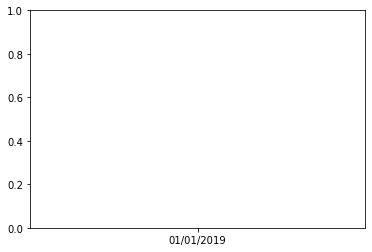

In [388]:
plt.plot(mergetry.date, list)

In [400]:
%matplotlib inline

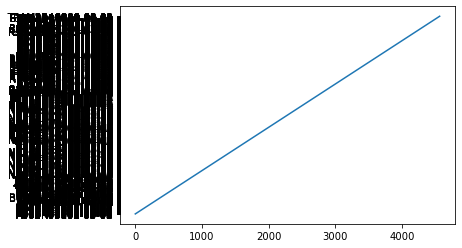

In [401]:
plt.plot(df_entries.turnstile)

In [402]:
mergetry.head(1)

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,oct_entries,oct_exits,nov_total_entries,nov_total_exits,nov_entries,nov_exits,dec_total_entries,dec_total_exits,dec_entries,dec_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,36282,13046,7291597,2470898,36992,12741,7327981,2483723,36384,12825


In [404]:
mergetry.groupby('station').head()

,turnstile,station,date,time,starting_entries,starting_exits,jan_total_entries,jan_total_exits,jan_entries,jan_exits,...,oct_entries,oct_exits,nov_total_entries,nov_total_exits,nov_entries,nov_exits,dec_total_entries,dec_total_exits,dec_entries,dec_exits
0,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751,6929443,2350222,37460,13471,...,36282,13046,7291597,2470898,36992,12741,7327981,2483723,36384,12825
1,A002R05102-00-01,59 ST,01/01/2019,03:00:00,6154087,1379509,6183833,1386805,29746,7296,...,29556,7213,6480337,1455867,29752,6859,6511664,1463432,31327,7565
2,A002R05102-03-00,59 ST,01/01/2019,03:00:00,1174914,4407789,1188012,4461911,13098,54122,...,13440,58761,1321053,4985950,13814,56571,1336138,5041602,15085,55652
3,A002R05102-03-01,59 ST,01/01/2019,03:00:00,951925,1477987,985893,1529522,33968,51535,...,33832,54541,1339253,2048131,33765,56394,1372664,2101904,33411,53773
4,A002R05102-03-02,59 ST,01/01/2019,03:00:00,6036340,8168269,6070764,8207047,34424,38778,...,34220,38978,6425600,8590577,33115,41054,6457226,8630142,31626,39565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4558,TRAM2R46900-00-00,RIT-ROOSEVELT,01/01/2019,00:00:00,17886,311,56325,905,38439,594,...,43892,696,449740,8267,33938,594,483612,8934,33872,667
4559,TRAM2R46900-00-01,RIT-ROOSEVELT,01/01/2019,00:00:00,2876975,33342,2918609,33854,41634,512,...,43029,554,3332619,40301,36837,530,3368564,40854,35945,553
4560,TRAM2R46900-03-00,RIT-ROOSEVELT,01/01/2019,00:00:00,635516,24341,641218,24634,5702,293,...,10030,393,725808,28493,8057,341,732578,28810,6770,317
4561,TRAM2R46900-03-01,RIT-ROOSEVELT,01/01/2019,00:00:00,3015572,390232,3021383,390543,5811,311,...,9484,430,3107210,394742,7698,388,3114168,395141,6958,399


In [406]:
df_entries.groupby('station').head()

,turnstile,station,jan_entries,feb_entries,mar_entries,april_entries,may_entries,jun_entries,jul_entries,aug_entries,sep_entries,oct_entries,nov_entries,dec_entries
0,A002R05102-00-00,59 ST,37460,32610,38380,39087,40342,38144,73700,7153562,64761,36282,36992,36384
1,A002R05102-00-01,59 ST,29746,25806,30262,31879,32928,31662,61529,6366237,54792,29556,29752,31327
2,A002R05102-03-00,59 ST,13098,11234,12779,13879,13811,12776,25766,1265481,28318,13440,13814,15085
3,A002R05102-03-01,59 ST,33968,30501,34276,35835,36478,34036,68881,1191864,79792,33832,33765,33411
4,A002R05102-03-02,59 ST,34424,29409,34074,36315,37240,34624,70294,6278096,80169,34220,33115,31626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4558,TRAM2R46900-00-00,RIT-ROOSEVELT,38439,25013,22730,46040,42391,42655,85564,278063,93847,43892,33938,33872
4559,TRAM2R46900-00-01,RIT-ROOSEVELT,41634,26075,22064,45921,42064,44163,88160,3142893,109860,43029,36837,35945
4560,TRAM2R46900-03-00,RIT-ROOSEVELT,5702,6258,3050,11794,9474,7614,16433,688227,19494,10030,8057,6770
4561,TRAM2R46900-03-01,RIT-ROOSEVELT,5811,6339,3210,12459,9876,7981,16946,3070213,19815,9484,7698,6958


In [407]:
df_entries.head(1)

,turnstile,station,jan_entries,feb_entries,mar_entries,april_entries,may_entries,jun_entries,jul_entries,aug_entries,sep_entries,oct_entries,nov_entries,dec_entries
0,A002R05102-00-00,59 ST,37460,32610,38380,39087,40342,38144,73700,7153562,64761,36282,36992,36384


In [412]:
cols = list(df_entries[2:])
cols = ['jan_entries','feb_entries','mar_entries','apr_entries','may_entries']

TypeError: 'list' object is not callable

In [420]:
cols = []
for columns in df_entries.columns[2:]:
    cols.append(columns)

In [421]:
cols

['jan_entries',
 'feb_entries',
 'mar_entries',
 'april_entries',
 'may_entries',
 'jun_entries',
 'jul_entries',
 'aug_entries',
 'sep_entries',
 'oct_entries',
 'nov_entries',
 'dec_entries']

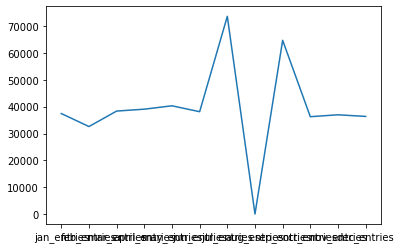

In [430]:
plt.plot(cols, df_entries.loc[0][2:])


In [444]:
pivottry1.iloc[0,1]

6929443.0

In [445]:
df_entries2 = pivottry1['entries']

In [448]:
df_entries2.diff(axis=1)

date,01/01/2019,01/31/2019,02/28/2019,03/31/2019,04/30/2019,05/31/2019,06/30/2019,07/31/2019,08/31/2019,09/30/2019,10/31/2019,11/30/2019,12/31/2019
turnstile,,,,,,,,,,,,,
A002R05102-00-00,NaN,37460.0,32610.0,38380.0,39087.0,40342.0,38144.0,35556.0,30280.0,34481.0,36282.0,36992.0,36384.0
A002R05102-00-01,NaN,29746.0,25806.0,30262.0,31879.0,32928.0,31662.0,29867.0,26515.0,28277.0,29556.0,29752.0,31327.0
A002R05102-03-00,NaN,13098.0,11234.0,12779.0,13879.0,13811.0,12776.0,12990.0,15021.0,13297.0,13440.0,13814.0,15085.0
A002R05102-03-01,NaN,33968.0,30501.0,34276.0,35835.0,36478.0,34036.0,34845.0,43276.0,36516.0,33832.0,33765.0,33411.0
A002R05102-03-02,NaN,34424.0,29409.0,34074.0,36315.0,37240.0,34624.0,35670.0,43880.0,36289.0,34220.0,33115.0,31626.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAM2R46900-00-01,NaN,41634.0,26075.0,22064.0,45921.0,42064.0,44163.0,43997.0,57827.0,52033.0,43029.0,36837.0,35945.0
TRAM2R46900-03-00,NaN,5702.0,6258.0,3050.0,11794.0,9474.0,7614.0,8819.0,9975.0,9519.0,10030.0,8057.0,6770.0
TRAM2R46900-03-01,NaN,5811.0,6339.0,3210.0,12459.0,9876.0,7981.0,8965.0,10311.0,9504.0,9484.0,7698.0,6958.0


In [451]:
mergetry_new = mergetry['jan_entries','feb_entries','mar_entries','apr_entries','may_entries','jun_entries','jul_entries','aug_entries','sep_entries','oct_entries','nov_entries','dec_entries']

KeyError: ('jan_entries', 'feb_entries', 'mar_entries', 'apr_entries', 'may_entries', 'jun_entries', 'jul_entries', 'aug_entries', 'sep_entries', 'oct_entries', 'nov_entries', 'dec_entries')

In [467]:
concattry.groupby(['turnstile'])[['turnstile','station','entries']].head()

,turnstile,station,entries
18,A002R05102-00-00,59 ST,6891983
59,A002R05102-00-01,59 ST,6154087
101,A002R05102-03-00,59 ST,1174914
143,A002R05102-03-01,59 ST,951925
185,A002R05102-03-02,59 ST,6036340
...,...,...,...
2647011,R514R09400-05-00,ASTORIA BLVD,12
2647057,R514R09400-05-01,ASTORIA BLVD,0
2647103,R514R09400-05-03,ASTORIA BLVD,36569106
2647149,R514R09400-06-00,ASTORIA BLVD,555


In [460]:
concattry

,turnstile,station,date,time,entries,exits
18,A002R05102-00-00,59 ST,01/01/2019,03:00:00,6891983,2336751
59,A002R05102-00-01,59 ST,01/01/2019,03:00:00,6154087,1379509
101,A002R05102-03-00,59 ST,01/01/2019,03:00:00,1174914,4407789
143,A002R05102-03-01,59 ST,01/01/2019,03:00:00,951925,1477987
185,A002R05102-03-02,59 ST,01/01/2019,03:00:00,6036340,8168269
...,...,...,...,...,...,...
2667526,TRAM2R46900-00-01,RIT-ROOSEVELT,12/31/2019,20:00:00,3368564,40854
2667570,TRAM2R46900-03-00,RIT-ROOSEVELT,12/31/2019,20:00:00,732578,28810
2667614,TRAM2R46900-03-01,RIT-ROOSEVELT,12/31/2019,20:00:00,3114168,395141
2667658,TRAM2R46900-05-00,RIT-ROOSEVELT,12/31/2019,20:00:00,3037,62


In [474]:
turnstiles_daily = (concattry
                        .groupby(['station','turnstile', 'date'],as_index=False)
                        .entries.first())

In [479]:
turnstiles_daily[turnstiles_daily.station=='59 ST']

,station,turnstile,date,entries
16932,59 ST,A002R05102-00-00,01/01/2019,6891983
16933,59 ST,A002R05102-00-00,01/31/2019,6929443
16934,59 ST,A002R05102-00-00,02/28/2019,6962053
16935,59 ST,A002R05102-00-00,03/31/2019,7000433
16936,59 ST,A002R05102-00-00,04/30/2019,7039520
...,...,...,...,...
17608,59 ST,R245R05100-05-02,08/31/2019,7658926
17609,59 ST,R245R05100-05-02,09/30/2019,7688219
17610,59 ST,R245R05100-05-02,10/31/2019,7721372
17611,59 ST,R245R05100-05-02,11/30/2019,7752388


In [481]:
turnstiles_daily.sample(8)

,station,turnstile,date,entries
60058,UTICA AV,N120R15300-00-03,04/30/2019,15195169
31398,CATHEDRAL PKWY,R172R19200-00-01,02/28/2019,55735
41467,GRD CNTRL-42 ST,R237R04601-00-02,10/31/2019,6314730
13689,45 ST,C019R23200-00-02,01/31/2019,1003765
33014,CITY / BUS,PTH07R55000-00-07,11/30/2019,346474
11753,34 ST-PENN STA,R137R03102-00-00,09/30/2019,5167895
33566,CLINTON-WASH AV,N112AR28401-06-00,05/31/2019,114256
30529,CANAL ST,A046R46300-06-08,07/31/2019,1603958


In [485]:
concattry.date.nunique()

13

In [486]:
df.head(1)

,ca,unit,scp,station,linename,division,date,time,desc,feb_total_entries,feb_total_exits,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,2335920,A002R05102-00-00


In [488]:
concattry.station.nunique()

379

In [489]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

KeyError: 'C/A'

In [490]:
turnstiles_daily

,station,turnstile,date,entries
0,1 AV,H007AR24802-03-00,10/31/2019,30
1,1 AV,H007AR24802-03-00,11/30/2019,1705
2,1 AV,H007AR24802-03-00,12/31/2019,4087
3,1 AV,H007AR24802-03-01,10/31/2019,39
4,1 AV,H007AR24802-03-01,11/30/2019,6850
...,...,...,...,...
63157,ZEREGA AV,R419R32600-05-01,08/31/2019,39
63158,ZEREGA AV,R419R32600-05-01,09/30/2019,39
63159,ZEREGA AV,R419R32600-05-01,10/31/2019,39
63160,ZEREGA AV,R419R32600-05-01,11/30/2019,39
